# Lab-9: Callbacks: NNs, checkpoints, early stopping



Import Boston dataset.

In [80]:
import tensorflow as tf

(X_train,y_train),(X_test,y_test)= tf.keras.datasets.boston_housing.load_data()

print(X_train.shape)

print(X_test.shape)

(404, 13)
(102, 13)
15.2


Create a simple Dense network with 2-3 Dense layers. Compile it

In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

Train and look at the resulting loss.

In [48]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=60)

Train on 404 samples, validate on 102 samples
Epoch 1/60
404/404 [==============================] - 1s 3ms/sample - loss: 77128.5413 - val_loss: 2652.7890
Epoch 2/60
404/404 [==============================] - 0s 518us/sample - loss: 13274.9321 - val_loss: 6876.5981
Epoch 3/60
404/404 [==============================] - 0s 387us/sample - loss: 2972.2231 - val_loss: 3019.2218
Epoch 4/60
404/404 [==============================] - 0s 415us/sample - loss: 1374.8581 - val_loss: 262.6329
Epoch 5/60
404/404 [==============================] - 0s 406us/sample - loss: 445.6610 -

Add BatchNormalization before each layer. 

In [62]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

Train. Compare the resulting loss. You can plot both losses for visualization

In [63]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=50)


Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 2s 5ms/sample - loss: 564.0933 - val_loss: 813.9103
Epoch 2/50
404/404 [==============================] - 0s 354us/sample - loss: 530.4608 - val_loss: 764.4775
Epoch 3/50
404/404 [==============================] - 0s 440us/sample - loss: 515.8688 - val_loss: 658.6118
Epoch 4/50
404/404 [==============================] - 0s 528us/sample - loss: 505.3066 - val_loss: 638.7366
Epoch 5/50
404/404 [=============

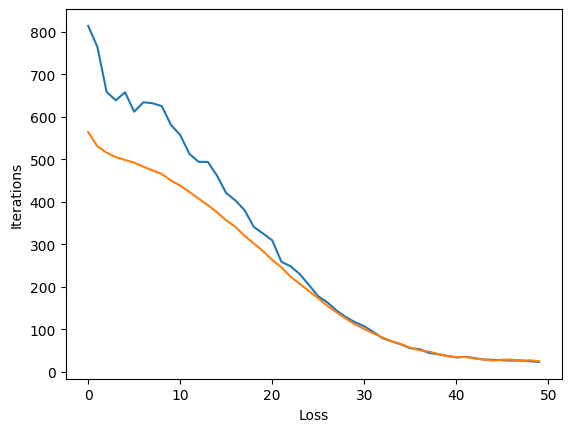

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()


In [67]:
filepath='chkpt/'


checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True,verbose=1)

callbacks_list = [checkpoint]

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=32, callbacks=callbacks_list)

Train on 404 samples, validate on 102 samples
Epoch 1/15
288/404 [====================>.........] - ETA: 0s - loss: 22.7639
Epoch 00001: val_loss improved from inf to 25.93949, saving model to chkpt/
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: chkpt/assets
404/404 [==============================] - 2s 5ms/sample - loss: 24.5689 - val_loss: 25.9395
Epoch 2/15
320/404 [======================>.......] - ETA: 0s - loss: 22.7249
Epoch 00002: val_loss improved from 25.93949 to 24.38591, saving model to chkpt/
INFO:tensorflow:Assets written to: chkpt/assets
404/404 [==============================] - 2s 4ms/sample - loss: 24.6281 - val_loss: 24.3859
Epoch 3/15
288/404 [====================>.........] - ETA: 0s - loss: 28.8292
Ep

In [68]:

earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
callbacks_list = [earlystop]
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=32, callbacks=callbacks_list)

Train on 404 samples, validate on 102 samples
Epoch 1/15
404/404 [==============================] - 0s 533us/sample - loss: 27.1658 - val_loss: 24.2611
Epoch 2/15
404/404 [==============================] - 0s 657us/sample - loss: 24.8441 - val_loss: 22.4671
Epoch 3/15
404/404 [==============================] - 0s 445us/sample - loss: 25.2515 - val_loss: 26.1693
Epoch 4/15
404/404 [==============================] - 0s 427us/sample - loss: 25.7348 - val_loss: 21.5168
Epoch 5/15
404/404 [============================

In [79]:
def scheduler(e,lr):
    return lr/1.2
LearningRateSchedulerscheduler = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)
callbacks_list = [LearningRateSchedulerscheduler]
model.compile(optimizer='adam', loss='mse')

print(model.optimizer.lr.numpy(), 5)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=32, callbacks=callbacks_list)
print(model.optimizer.lr.numpy(), 5)

0.001 5
Train on 404 samples, validate on 102 samples
Epoch 1/15
404/404 [==============================] - 2s 5ms/sample - loss: 309777.1037 - val_loss: 254871.4412
Epoch 2/15
404/404 [==============================] - 0s 447us/sample - loss: 298102.9811 - val_loss: 248250.3649
Epoch 3/15
404/404 [==============================] - 0s 693us/sample - loss: 289999.1853 - val_loss: 243328.5383
Epoch 4/15
404/404 [==============================] - 0s 409us/sample - loss: 280081.5532 - val_loss: 238923.0959
Epoch 5/15
404/404 [==============================] - 0s